In [1]:
##import
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

##estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model

##Model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

##cross validation
from sklearn.model_selection import train_test_split

In [2]:
credit = pd.read_csv(r'C:\Users\Eric\Documents\Data Analytics\Parte 5\2. Prepare and Explore the Data\default of credit card clients.csv', header =1)

colocar una r antes de la direccion

ANÁLISIS DESCRIPTIVO DE LA INFORMACIÓN

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
## Preprocesamiento
credit.dropna() ##quitar filas con variables nulas

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
credit.dtypes ##tipos de valores

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
pd.unique(credit['SEX']) ##valores unicos

array([2, 1], dtype=int64)

In [9]:
pd.unique(credit['EDUCATION'])

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [10]:
pd.unique(credit['MARRIAGE'])

array([1, 2, 3, 0], dtype=int64)

In [11]:
pd.unique(credit['default payment next month'])

array([1, 0], dtype=int64)

In [12]:
credit['LIMIT_BAL'].describe() ##estadística básica

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [13]:
pd.unique(credit['PAY_0'])

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [14]:
pd.unique(credit['PAY_2'])

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [15]:
pd.unique(credit['PAY_3'])

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

In [16]:
#Métricas individuales
credit['LIMIT_BAL'].min()

10000

In [17]:
credit['LIMIT_BAL'].max()

1000000

In [18]:
credit['LIMIT_BAL'].mean()

167484.32266666667

In [19]:
credit['LIMIT_BAL'].std()

129747.66156719506

In [20]:
credit['LIMIT_BAL'].count()

30000

In [21]:
#Data agrupada
grouped_data = credit.groupby('SEX') 

In [22]:
grouped_data.describe()

ID                                                              \
       count          mean          std  min      25%      50%       75%   
SEX                                                                        
1    11888.0  14802.770104  8957.861425  5.0  7056.75  14083.5  23994.25   
2    18112.0  15130.282078  8457.209453  1.0  7783.25  15784.5  22355.25   

             LIMIT_BAL                 ... PAY_AMT6            \
         max     count           mean  ...      75%       max   
SEX                                    ...                      
1    30000.0   11888.0  163519.825034  ...   4000.0  527143.0   
2    29283.0   18112.0  170086.462014  ...   4150.0  528666.0   

    default payment next month                                               
                         count      mean       std  min  25%  50%  75%  max  
SEX                                                                          
1                      11888.0  0.241672  0.428115  0.0  0.0  0.0  0.0  1.0  
2                      18112.0  0.207763  0.405717  0.0  0.0  0.0  0.0  1.0  

[2 rows x 192 columns]

In [23]:
grouped_data1 = credit.groupby('EDUCATION') 
grouped_data1.describe()

ID                                                        \
             count          mean          std     min       25%      50%   
EDUCATION                                                                  
0             14.0  17091.357143  7468.648283  3770.0  14751.00  17156.0   
1          10585.0  14697.212187  8734.356414     6.0   7102.00  14186.0   
2          14030.0  15024.237776  8537.380830     1.0   7687.50  15276.5   
3           4917.0  15342.314013  8830.724241     9.0   7571.00  15604.0   
4            123.0  18143.447154  8281.127014   359.0  11703.50  20435.0   
5            280.0  17443.664286  8254.361504    48.0  10569.25  19104.5   
6             51.0  16895.019608  8811.125189   503.0  11787.00  16821.0   

                             LIMIT_BAL                 ... PAY_AMT6            \
                75%      max     count           mean  ...      75%       max   
EDUCATION                                              ...                      
0          22434.00  27271.0      14.0  217142.857143  ...   3705.0   15381.0   
1          22336.00  29994.0   10585.0  212956.069910  ...   5000.0  527143.0   
2          22279.75  30000.0   14030.0  147062.437634  ...   3700.0  528666.0   
3          23135.00  29999.0    4917.0  126550.270490  ...   3045.0  219844.0   
4          23998.50  29848.0     123.0  220894.308943  ...   5000.0   86000.0   
5          24193.25  29967.0     280.0  168164.285714  ...   4619.5  158956.0   
6          24071.00  29837.0      51.0  148235.294118  ...   3838.0  171944.0   

          default payment next month                                          \
                               count      mean       std  min  25%  50%  75%   
EDUCATION                                                                      
0                               14.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
1                            10585.0  0.192348  0.394163  0.0  0.0  0.0  0.0   
2                            14030.0  0.237349  0.425473  0.0  0.0  0.0  0.0   
3                             4917.0  0.251576  0.433963  0.0  0.0  0.0  1.0   
4                              123.0  0.056911  0.232619  0.0  0.0  0.0  0.0   
5                              280.0  0.064286  0.245700  0.0  0.0  0.0  0.0   
6                               51.0  0.156863  0.367290  0.0  0.0  0.0  0.0   

                
           max  
EDUCATION       
0          0.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
5          1.0  
6          1.0  

[7 rows x 192 columns]

In [24]:
grouped_data2 = credit.groupby('MARRIAGE') 
grouped_data2.describe()

ID                                                      \
            count          mean          std    min      25%      50%   
MARRIAGE                                                                
0            54.0  15755.796296  9161.417426  219.0  8188.75  17553.5   
1         13659.0  15253.288821  8677.657909    1.0  7729.50  15386.0   
2         15964.0  14807.277813  8635.018498    2.0  7364.50  14670.5   
3           323.0  13734.154799  8776.888676   16.0  5788.00  13467.0   

                            LIMIT_BAL                 ... PAY_AMT6            \
               75%      max     count           mean  ...      75%       max   
MARRIAGE                                              ...                      
0         23304.75  29112.0      54.0  132962.962963  ...   2000.0   38852.0   
1         22935.00  30000.0   13659.0  182200.893184  ...   4200.0  443001.0   
2         22108.00  29998.0   15964.0  156413.660737  ...   4000.0  528666.0   
3         21152.50  29932.0     323.0   98080.495356  ...   2500.0  221000.0   

         default payment next month                                          \
                              count      mean       std  min  25%  50%  75%   
MARRIAGE                                                                      
0                              54.0  0.092593  0.292582  0.0  0.0  0.0  0.0   
1                           13659.0  0.234717  0.423837  0.0  0.0  0.0  0.0   
2                           15964.0  0.209283  0.406810  0.0  0.0  0.0  0.0   
3                             323.0  0.260062  0.439349  0.0  0.0  0.0  1.0   

               
          max  
MARRIAGE       
0         1.0  
1         1.0  
2         1.0  
3         1.0  

[4 rows x 192 columns]

In [25]:
#estadística de data agrupada
grouped_data.mean() 

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,45000.331090,41587.504963,40101.775320,5668.537264,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,42122.600099,39473.816807,38064.427286,5660.327076,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,0.207763


In [26]:
##Cambiar variables a categóricas
credit.SEX= credit.SEX.astype("category")

In [27]:
credit.ID= credit.ID.astype("category")

In [28]:
credit.EDUCATION= credit.EDUCATION.astype("category")

In [29]:
credit.MARRIAGE= credit.MARRIAGE.astype("category")

In [30]:
credit.rename(columns={'default payment next month':'default_payment_next_month'},
               inplace=True)
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [31]:
credit.default_payment_next_month= credit.default_payment_next_month.astype("category")

In [32]:
credit.PAY_0= credit.PAY_0.astype("category")

In [33]:
credit.PAY_2= credit.PAY_2.astype("category")

In [34]:
credit.PAY_3= credit.PAY_3.astype("category")

In [35]:
credit.PAY_4= credit.PAY_4.astype("category")

In [36]:
credit.PAY_5= credit.PAY_5.astype("category")

In [37]:
credit.PAY_6= credit.PAY_6.astype("category")

In [38]:
credit.PAY_6.dtypes ##tipos de valores

CategoricalDtype(categories=[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8], ordered=False)

In [39]:
credit.dtypes ##tipos de valores

ID                            category
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default_payment_next_month    category
dtype: object

In [40]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')


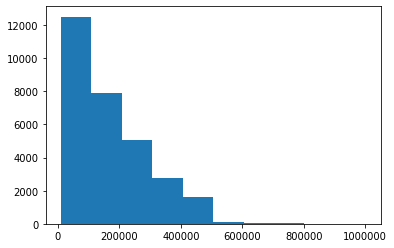

In [41]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

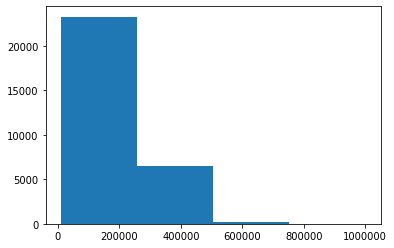

In [42]:
plt.hist(credit['LIMIT_BAL'], bins=4)

In [43]:
##la mayoría de los créditos son menores a 200 mil dólares

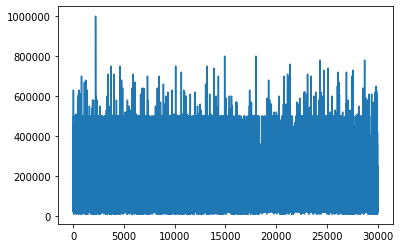

In [44]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

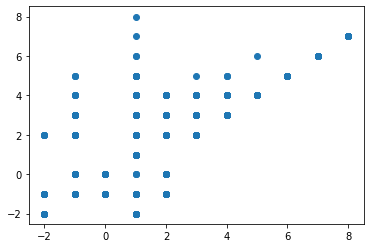

In [45]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

In [46]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')


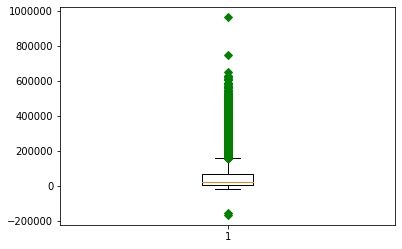

In [47]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

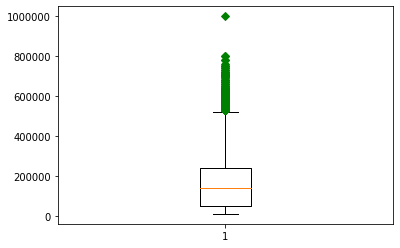

In [48]:
A = credit['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

##Matriz de correlación
corrMat = credit.corr()
print(corrMat)

In [49]:
covMat = credit.cov () 
print (covMat)

              LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT1   4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAY_AMT4   4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAY_AMT5   4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAY_AMT6   5.065153e

In [50]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

Mayoría de créditos otorgados a mujeres

In [51]:
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

Mayoría con educación universitaria, seguido escolar

In [52]:
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

solteros y casados por igual 

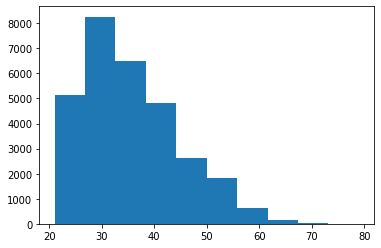

In [53]:
plt.hist(credit['AGE'])
plt.show()

maroría entre 30 y 40 años

In [54]:
import seaborn as sns 

C:\Users\Eric\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


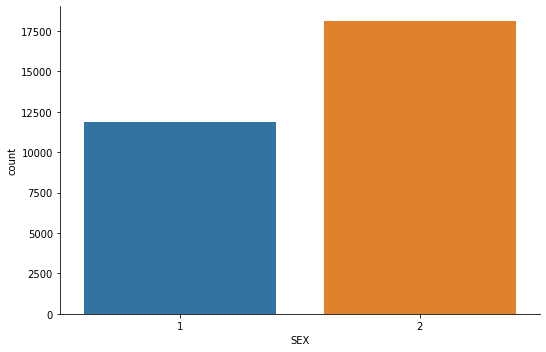

In [55]:
sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)

In [56]:
# Número de mujeres y hombres por límite de crédito 
credit.groupby(['SEX', 'LIMIT_BAL'])['SEX'].count()

SEX  LIMIT_BAL
1    10000         306
     16000           1
     20000        1110
     30000         593
     40000          87
                  ... 
2    720000          2
     740000          1
     750000          4
     780000          1
     1000000         1
Name: SEX, Length: 155, dtype: int64

In [57]:
# Número de mujeres y hombres por pago
credit.groupby(['SEX', 'default_payment_next_month'])['SEX'].count()

SEX  default_payment_next_month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: SEX, dtype: int64

hombres 24% no pago, mujeres 21% no pago

In [58]:
# Número de estado civil por pago
credit.groupby(['MARRIAGE', 'default_payment_next_month'])['MARRIAGE'].count()

MARRIAGE  default_payment_next_month
0         0                                49
          1                                 5
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               239
          1                                84
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, "Distribution of CLIENTES' AGE")

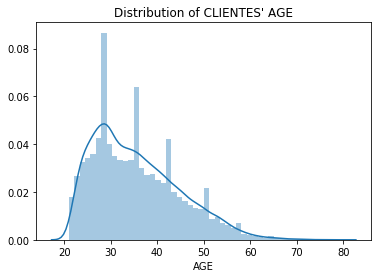

In [59]:
# Distribution of AGE
age = credit['AGE'].dropna()
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of CLIENTES' AGE")

mayor proporción alrededor de los 28 años

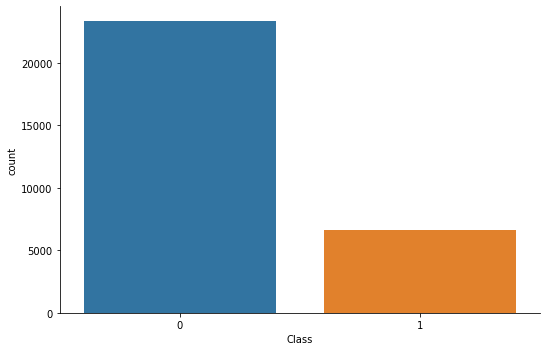

In [60]:
import seaborn as sns 
fg = sns.factorplot('default_payment_next_month', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Class')

In [61]:
import numpy as np
credit.pivot_table('AGE', 'MARRIAGE', 'default_payment_next_month', aggfunc=np.sum, margins=True)

default_payment_next_month,0,1,All
MARRIAGE,,,
0,1862,180,2042
1,417495,129093,546588
2,397960,104151,502111
3,10172,3652,13824
All,827489,237076,1064565


In [62]:
table = pd.crosstab(index=[credit.EDUCATION], columns=[credit.default_payment_next_month])

In [63]:
table.unstack()

default_payment_next_month  EDUCATION
0                           0               14
                            1             8549
                            2            10700
                            3             3680
                            4              116
                            5              262
                            6               43
1                           0                0
                            1             2036
                            2             3330
                            3             1237
                            4                7
                            5               18
                            6                8
dtype: int64

In [64]:
table2 = pd.crosstab(index=[credit.LIMIT_BAL,credit.SEX], columns=[credit.default_payment_next_month])
table2.unstack()

default_payment_next_month      0             1       
SEX                             1      2      1      2
LIMIT_BAL                                             
10000                       186.0  110.0  120.0   77.0
16000                         1.0    1.0    0.0    0.0
20000                       711.0  567.0  399.0  299.0
30000                       376.0  666.0  217.0  351.0
40000                        55.0   83.0   32.0   60.0
...                           ...    ...    ...    ...
750000                        NaN    4.0    NaN    0.0
760000                        1.0    NaN    0.0    NaN
780000                        1.0    1.0    0.0    0.0
800000                        2.0    NaN    0.0    NaN
1000000                       NaN    1.0    NaN    0.0

[81 rows x 4 columns]

In [65]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [66]:
credit.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [67]:
def joven_adulto(person):
    AGE, SEX = person
    
    if AGE < 35:
        return '1'
    else:
        return '2'
credit['person'] = credit[['AGE', 'SEX']].apply(joven_adulto, axis=1)
credit[:10]


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,person
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,2
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,2
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,1
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,1
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,1
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,2


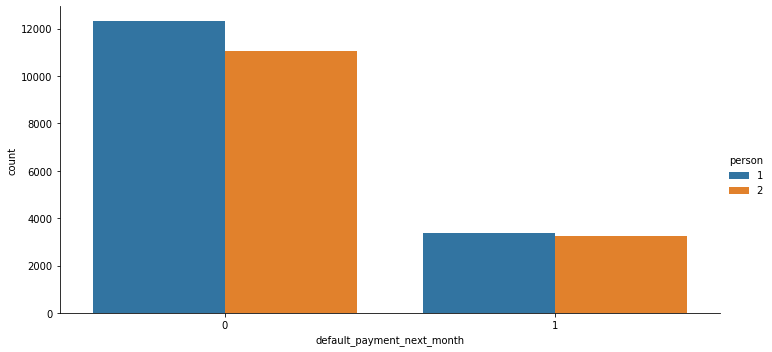

In [68]:
sns.factorplot('default_payment_next_month', data=credit, kind='count', hue='person', order=[0,1], 
               hue_order=['1','2'], aspect=2)

Parece mantenerse la proporción de pago entre jóvenes y adultos 

In [69]:
def alto_bajo(limite):
    LIMIT_BAL, person = limite
    
    if LIMIT_BAL < 300000:
        return '1'
    else:
        return '2'
credit['limite'] = credit[['LIMIT_BAL', 'person']].apply(alto_bajo, axis=1)
credit[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,person,limite
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,1,1
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,2,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,2,1
5,6,50000,1,1,2,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,2,1
6,7,500000,1,1,2,29,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,1,2
7,8,100000,2,2,2,23,0,-1,-1,0,...,567,380,601,0,581,1687,1542,0,1,1
8,9,140000,2,3,1,28,0,0,2,0,...,3719,3329,0,432,1000,1000,1000,0,1,1
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13912,0,0,0,13007,1122,0,0,2,1


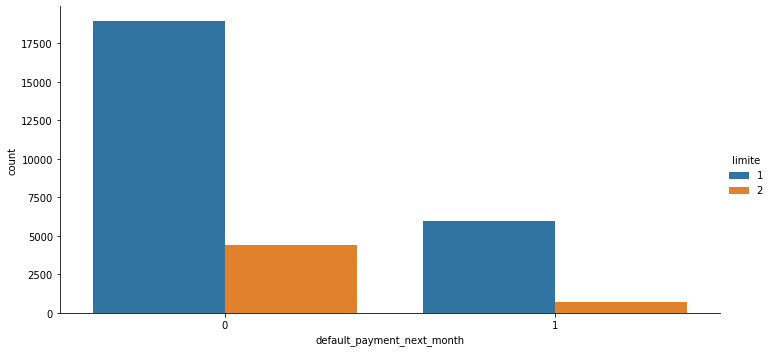

In [70]:
sns.factorplot('default_payment_next_month', data=credit, kind='count', hue='limite', order=[0,1], 
               hue_order=['1','2'], aspect=2)

Parece mantenerse la proporción de pago entre créditos altos y bajos

In [71]:
person= credit.person
credit.person= person.astype("category")
limite= credit.limite
credit.limite= limite.astype("category")

In [72]:
credit.dtypes ##tipos de valores

ID                            category
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default_payment_next_month    category
person                   

In [73]:
credit['limite'].value_counts()

1    24883
2     5117
Name: limite, dtype: int64

In [74]:
credit['person'].value_counts()

1    15696
2    14304
Name: person, dtype: int64

In [75]:
table3 = pd.crosstab(index=[credit.limite,credit.person], columns=[credit.default_payment_next_month])
table3.unstack()

default_payment_next_month      0           1      
person                          1     2     1     2
limite                                             
1                           10425  8522  3113  2823
2                            1900  2517   258   442

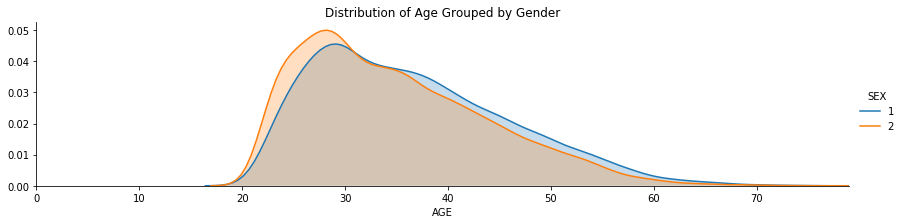

In [76]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

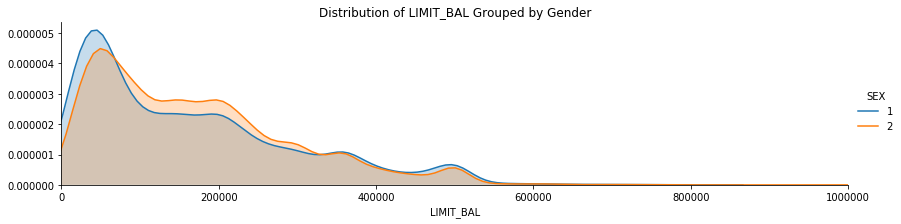

In [77]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of LIMIT_BAL Grouped by Gender')
fig.add_legend()

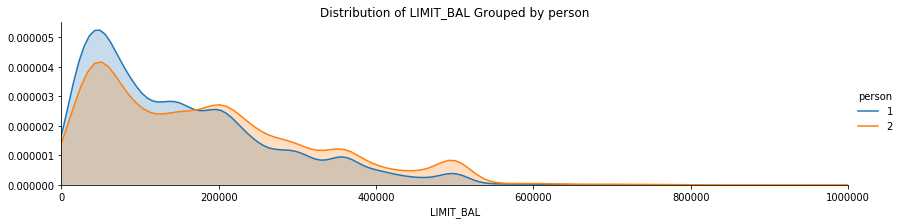

In [78]:
fig = sns.FacetGrid(credit, hue='person', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of LIMIT_BAL Grouped by person')
fig.add_legend()

personas jóvenes parecen tener una tendencia a acceder a créditos más bajos

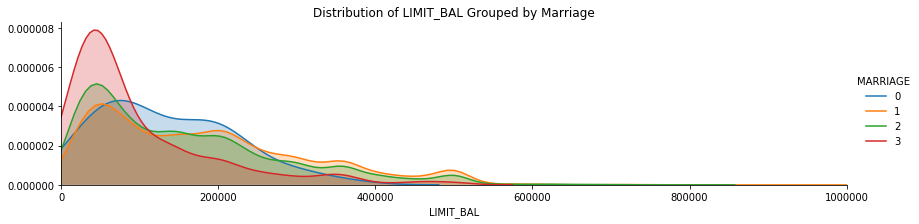

In [79]:
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of LIMIT_BAL Grouped by Marriage')
fig.add_legend()

personas divorsiadas acceden a créditos más bajos

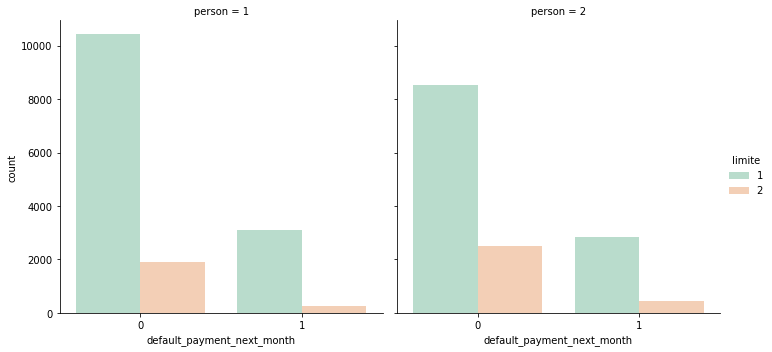

In [80]:
sns.factorplot('default_payment_next_month', data=credit, hue='limite', kind='count', palette='Pastel2', 
              col='person')

In [81]:
table4 = pd.crosstab(index=[credit.limite,credit.person], columns=[credit.default_payment_next_month])
table4.unstack()

default_payment_next_month      0           1      
person                          1     2     1     2
limite                                             
1                           10425  8522  3113  2823
2                            1900  2517   258   442

Entre las personas que no pagan sus créditos, alrededor de la mitad son jóvenes y un 89% de las personas que no pagan accedieron a un crédito bajo

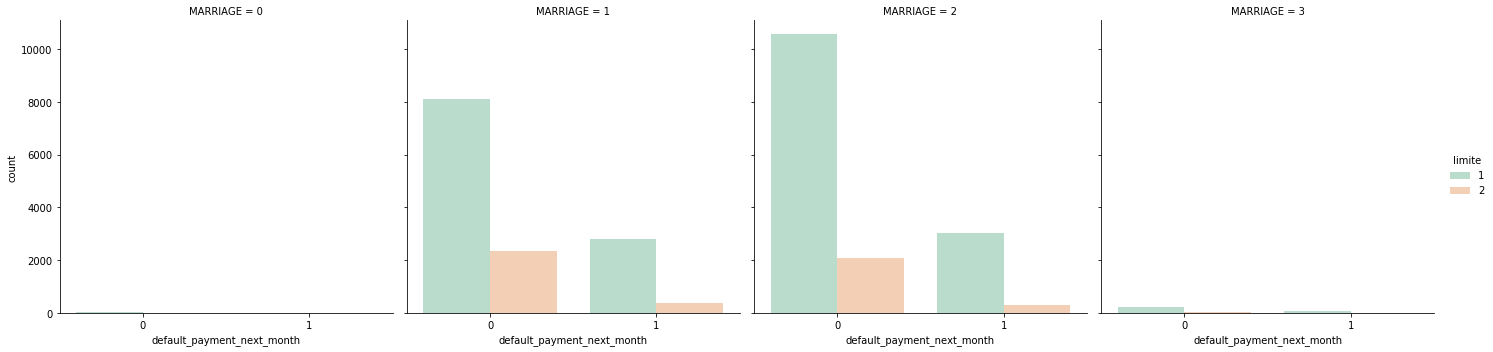

In [82]:
sns.factorplot('default_payment_next_month', data=credit, hue='limite', kind='count', palette='Pastel2', 
              col='MARRIAGE')

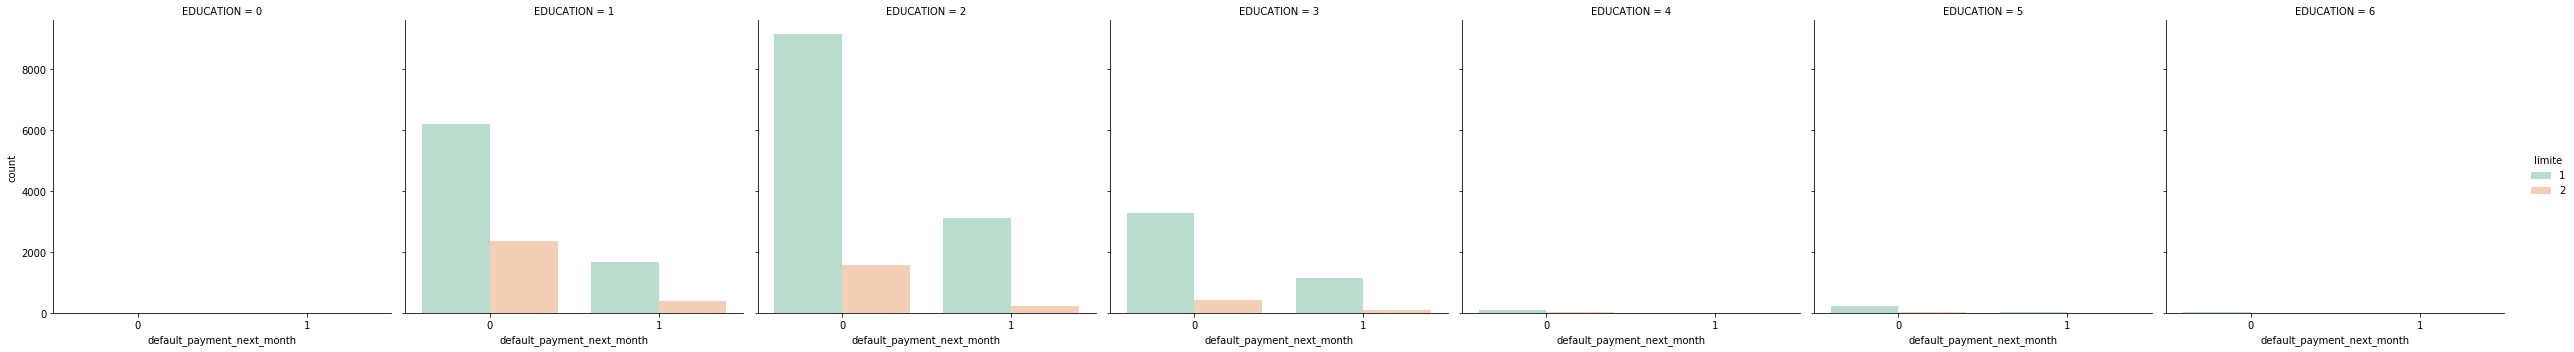

In [83]:
sns.factorplot('default_payment_next_month', data=credit, hue='limite', kind='count', palette='Pastel2', 
              col='EDUCATION')

Visualizando las variables de estado civil y educación se matienen las mismas proporciones entre personas jóvenes y adultos que no pagan sus créditos

In [84]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\eric\anaconda3\lib\site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


In [85]:
import sklearn as skl

COVARIANZA

In [86]:
covMat = credit.cov () 
print (covMat)

              LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT1   4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAY_AMT4   4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAY_AMT5   4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAY_AMT6   5.065153e

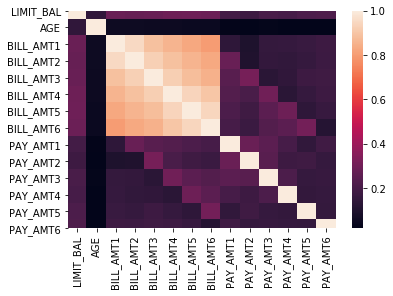

In [87]:
corr = credit.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

SELECCIÓN DE CARACTERÍSTICAS

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [89]:
default_payment_next_month = credit['default_payment_next_month']
# Aplicando el algoritmo univariante de prueba F.
k = 20  # número de atributos a seleccionar
entrenar = credit.drop(['default_payment_next_month'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, default_payment_next_month)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'person',
 'limite']

In [90]:
from sklearn.ensemble import ExtraTreesClassifier

In [91]:
# Algoritmo de Eliminación Recursiva de atributos con ExtraTrees
modelo = ExtraTreesClassifier()
era = RFE(modelo, 22)  # número de atributos a seleccionar
era = era.fit(entrenar, default_payment_next_month)
# imprimir resultados
atrib = era.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['ID',
 'LIMIT_BAL',
 'EDUCATION',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [92]:
# Importancia de atributos.
modelo.fit(entrenar, default_payment_next_month)
modelo.feature_importances_[:20]

array([0.05742091, 0.05389605, 0.01325517, 0.03205419, 0.02219856,
       0.05288586, 0.09039854, 0.05257342, 0.03500349, 0.03158098,
       0.02908413, 0.03164994, 0.04432971, 0.04141239, 0.04051321,
       0.04011069, 0.03966565, 0.04005509, 0.03956529, 0.03807557])

In [93]:
features = credit.loc[:, ['ID', 'LIMIT_BAL', 'EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT1','BILL_AMT1','BILL_AMT1','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

In [94]:
features.dtypes ##tipos de valores

ID           category
LIMIT_BAL       int64
EDUCATION    category
AGE             int64
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT1       int64
BILL_AMT1       int64
BILL_AMT1       int64
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
dtype: object

In [95]:
#features 
print('Summary of feature sample')
features.head()

Summary of feature sample


,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,2,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [96]:
#dependent variable
depVar = credit['default_payment_next_month']

MODELOS

In [97]:
# Modelos 
modelSVC = SVC(kernel='rbf', C=1) 
modelRF = RandomForestClassifier(n_estimators=2, criterion='gini',) 
modelKN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(features, depVar, test_size = 0.3,random_state = 0)

In [99]:
modelSVC.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
modelRF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
modelKN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

([<matplotlib.axis.XTick at 0x19958856988>,
 <a list of 5 Text xticklabel objects>)

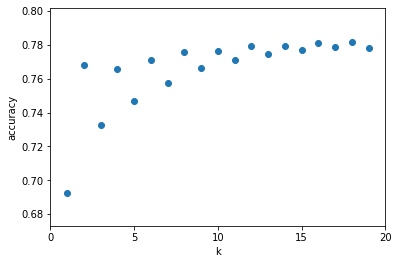

In [104]:
##Elegir el mejor valor de k
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [100]:
print(cross_val_score(modelSVC, x_train, y_train))
modelSVC.score (x_train, y_train)

[0.77642857 0.77642857 0.77642857 0.77642857 0.77619048]


0.7764761904761904

In [110]:
print(cross_val_score(modelRF, x_train, y_train))
modelRF.score (x_train, y_train)

[0.78119048 0.78285714 0.78380952 0.78119048 0.78357143]


0.9083333333333333

In [105]:
print(cross_val_score(modelKN, x_train, y_train))
modelKN.score(x_train, y_train)

[0.725      0.71857143 0.72119048 0.72666667 0.72071429]


0.8424761904761905

PREDICCIONES

In [101]:
prediccionSVC = modelSVC.predict(x_test)
accuracy_score(y_test, prediccionSVC)

0.7844444444444445

In [111]:
prediccionRF = modelRF.predict(x_test)
accuracy_score(y_test, prediccionRF)

0.7907777777777778

In [106]:
prediccionKN = modelKN.predict(x_test)
accuracy_score(y_test, prediccionKN)

0.7324444444444445

In [156]:
prediccionKN

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [107]:
confusion_matrix(y_test, prediccionKN)

array([[6155,  905],
       [1503,  437]], dtype=int64)

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediccionKN))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      7060
           1       0.33      0.23      0.27      1940

    accuracy                           0.73      9000
   macro avg       0.56      0.55      0.55      9000
weighted avg       0.70      0.73      0.71      9000



In [112]:
confusion_matrix(y_test, prediccionRF)

array([[6687,  373],
       [1510,  430]], dtype=int64)

In [113]:
print(classification_report(y_test, prediccionRF))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7060
           1       0.54      0.22      0.31      1940

    accuracy                           0.79      9000
   macro avg       0.68      0.58      0.60      9000
weighted avg       0.76      0.79      0.76      9000



In [102]:
confusion_matrix(y_test, prediccionSVC)

array([[7060,    0],
       [1940,    0]], dtype=int64)

SELECCIONAR MODELO KN